
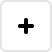
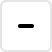
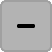
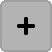
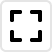
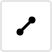
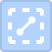
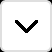
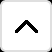
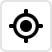
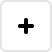
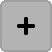
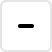
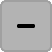
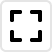
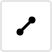
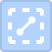
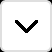
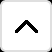
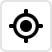

In [1]:
import numpy as np
from lets_plot import *
LetsPlot.setup_html()

In [2]:
np.random.seed(0) 
N = 200
noise = dict(
    x = np.random.uniform(0, 200, N),
    y = np.random.uniform(100, 400, N),
    size = np.random.uniform(0.1, 2, N)    
)
backdrop = geom_point(aes("x", "y", size="size"), data=noise, tooltips='none') 

In [3]:
items = [
    dict (
        name = "Lets-Plot\nMultiplatform",
        documentationUrl = "https://lets-plot.org",
        sourcesUrl = "https://github.com/JetBrains/lets-plot",
        x = 0, y = 0, size = 14, shape = 16, angle = 0
    ),
    dict (
        name = "Lets-Plot\nfor Python",
        documentationUrl = "https://lets-plot.org/kotlin/get-started.html",
        sourcesUrl = "https://github.com/JetBrains/lets-plot-kotlin",
        x = 130, y = 150, size = 9, shape = 15, angle = 15
    ),
    dict (
        name = "Lets-Plot\nfor Kotlin",
        documentationUrl = "https://lets-plot.org/kotlin/get-started.html",
        sourcesUrl = "https://github.com/JetBrains/lets-plot-kotlin",
        x = 200, y = 200, size = 7, shape = 15, angle = -15
    ),
    dict (
        name = "Lets-Plot\nCompose Multiplatform",
        documentationUrl = "https://github.com/JetBrains/lets-plot-skia",
        sourcesUrl = "https://github.com/JetBrains/lets-plot-skia",
        x = 80, y = 250, size = 7, shape = 15, angle = 30
    ),
    dict (
        name = "Geocoding",
        documentationUrl = "https://lets-plot.org/python/pages/geocoding.html",
        sourcesUrl = "https://github.com/JetBrains/lets-plot",
        x = 70, y = 320, size = 7, shape = 17, angle = 0
    ),
]

In [4]:
data = {
    "name": [],
    "documentationUrl": [],
    "sourcesUrl": [],
    "x": [],
    "y": [],
    "size": [],
    "shape": [],
    "angle": [],
}

for item in items:
    for key in data:
        data[key].append(item[key])


In [9]:
(ggplot(data) + backdrop
     + geom_point(aes("x", "y", size="size", shape="shape", angle="angle", color="name"), show_legend=False,
                  tooltips=layer_tooltips()
                      .title("@name")
                      .line("Links: <a href=\"@{documentationUrl}\">docs</a>, <a href=\"@{sourcesUrl}\">sources</a>")
                 )
     + geom_text(x=50, y=250, size=12,
                 label="Hover, then click\nto <a href=\"https://www.merriam-webster.com/dictionary/freeze\">freeze</a> the tooltip.\nClick links\nto navigate.")
     + geom_segment(x=70, y=250, xend=0, yend=0,
                    size_start=150, size_end=20,
                    arrow=arrow(type='open', angle=40))  
     + scale_shape_identity() + scale_size_identity()
     + scale_y_continuous(breaks=[150, 200, 250, 320])  
     + coord_polar()  
     + ylim(0, 400) + ggsize(800, 800) 
     + labs(
        title='The <a href=\"https://lets-plot.org/python/pages/gallery.html\">Observable</a> LP-verse',
        subtitle='Latest <a href="https://github.com/JetBrains/lets-plot/releases/latest">news</a>.',
        caption='User <a href="https://github.com/JetBrains/lets-plot/issues">stories</a>.')
     + theme(
        plot_title=element_text(size=25, face="bold", hjust=0.5),
        plot_subtitle=element_text(hjust=0.5),
        plot_margin=[40, 0, 0], 
        axis_title='blank',
        axis_text='blank',
        axis_ticks='blank',
        panel_grid='blank', 
        panel_grid_major_y=element_line(size=3, linetype='dotted') 
     )
     + flavor_high_contrast_dark()
)
